## Analyze the relationship between weather temperature and traveling

#### I import analytical tables generated from the data piplines of this project, create the plots for visualizing the relationship between weather temperatures and traveling.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# create table list in the folder
ana_tables_lst = [f for f in os.listdir("temperature_entry_Anal/") if os.path.isfile(os.path.join("temperature_entry_Anal/", f))]

In [3]:
ana_tables_lst

['2016-06_i94port_entry.csv',
 '2016-12_i94port_entry.csv',
 '2016-07_i94port_entry.csv',
 '2016-03_i94port_entry.csv',
 '2016-11_i94port_entry.csv',
 '2016-02_i94port_entry.csv',
 '2016-04_i94port_entry.csv',
 '2016-09_i94port_entry.csv',
 '2016-08_i94port_entry.csv',
 '2016-05_i94port_entry.csv',
 '2016-01_i94port_entry.csv',
 '2016-10_i94port_entry.csv']

In [4]:
# read all the files in the ana_tables_lst, convert them to pandas df, and store them in a dictionary. 
table_dict={}
for i in ana_tables_lst:
    tab = pd.read_csv("temperature_entry_Anal/" + i)
    tab = tab.drop(labels="Unnamed: 0", axis=1)
    tab.columns = ["i94port_city_code", "city", "state_code", "average_temperature"+i[5:7], "entry_month", "count"+i[5:7]]
    tab = tab.drop(labels="entry_month", axis=1)
    table_dict[i[:7]]=tab    

In [5]:
for i in table_dict:
    print(i)

2016-06
2016-12
2016-07
2016-03
2016-11
2016-02
2016-04
2016-09
2016-08
2016-05
2016-01
2016-10


In [6]:
apr = table_dict["2016-04"]

In [7]:
apr.head()

,i94port_city_code,city,state_code,average_temperature04,count04
0,NYC,new york,NY,10.3518,456897
1,MIA,miami,FL,23.1532,317536
2,LOS,los angeles,CA,14.2813,281537
3,SFR,san francisco,CA,13.9235,142534
4,ORL,orlando,FL,22.4294,139045


In [8]:
# create a base df for merging with other dataframes
df = apr.drop(["average_temperature04", "count04"], axis=1)

In [9]:
df.head(3)

,i94port_city_code,city,state_code
0,NYC,new york,NY
1,MIA,miami,FL
2,LOS,los angeles,CA


In [10]:
for key in table_dict:
    df = pd.merge(df, table_dict[key], left_on=["i94port_city_code", "city", "state_code"],
    right_on=["i94port_city_code", "city", "state_code"], how="inner")
    

In [11]:
df.head()

,i94port_city_code,city,state_code,average_temperature06,count06,average_temperature12,count12,average_temperature07,count07,average_temperature03,...,average_temperature09,count09,average_temperature08,count08,average_temperature05,count05,average_temperature01,count01,average_temperature10,count10
0,NYC,new york,NY,20.8164,564449,0.5486,465270,23.5460,650757,4.0863,...,18.5658,591842,22.2383,580316,15.9827,583086,-2.1680,279748,11.6313,626612
1,MIA,miami,FL,27.9179,351869,18.8349,519747,28.6234,433469,20.5774,...,27.8733,355816,28.9371,384979,25.7238,356902,17.9727,355603,25.1669,408776
2,LOS,los angeles,CA,21.2025,369136,9.3125,353143,25.0104,428893,12.8376,...,22.7234,415136,24.6668,367068,18.0044,325626,9.8689,252667,17.7118,373475
3,SFR,san francisco,CA,18.7754,197901,9.2044,152696,20.3911,231104,12.6966,...,19.7482,229531,20.1019,203577,16.4204,188026,9.1031,122960,16.6175,186884
4,ORL,orlando,FL,27.7912,122276,17.4636,131540,28.4833,179601,19.5216,...,27.6901,128725,28.8214,165230,25.4388,137751,16.5226,117667,24.4828,146380


In [12]:
i94port_list = df.i94port_city_code

In [13]:
temp_count_dict = {}
for i in i94port_list:
    df_sel = df[df["i94port_city_code"] == i]
    temp = []
    for n in range(3, 27, 2):
        temp.append(df_sel.iloc[:, n].values[0])
    count = []
    for n in range(4, 27, 2):
        count.append(df_sel.iloc[:, n].values[0])
        temp_count = pd.DataFrame([temp, count]).transpose()
        temp_count.columns = [i+"_temperature", i+"_counts"]
    temp_count_dict[i] = temp_count

In [14]:
temp_count_dict

{'NYC':     NYC_temperature  NYC_counts
 0           20.8164    564449.0
 1            0.5486    465270.0
 2           23.5460    650757.0
 3            4.0863    495964.0
 4            6.5895    410905.0
 5           -1.0146    312101.0
 6           10.3518    456897.0
 7           18.5658    591842.0
 8           22.2383    580316.0
 9           15.9827    583086.0
 10          -2.1680    279748.0
 11          11.6313    626612.0, 'MIA':     MIA_temperature  MIA_counts
 0           27.9179    351869.0
 1           18.8349    519747.0
 2           28.6234    433469.0
 3           20.5774    408052.0
 4           21.4517    397628.0
 5           18.9361    326829.0
 6           23.1532    317536.0
 7           27.8733    355816.0
 8           28.9371    384979.0
 9           25.7238    356902.0
 10          17.9727    355603.0
 11          25.1669    408776.0, 'LOS':     LOS_temperature  LOS_counts
 0           21.2025    369136.0
 1            9.3125    353143.0
 2           25.0104  

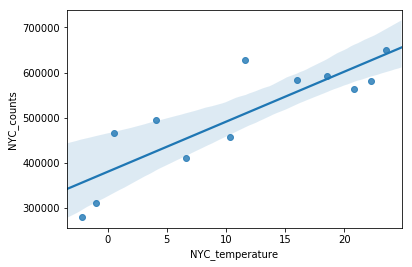

In [15]:
sns.regplot(temp_count_dict["NYC"].iloc[:,0], temp_count_dict["NYC"].iloc[:,1])
plt.xlabel = temp_count_dict["NYC"].columns[0]

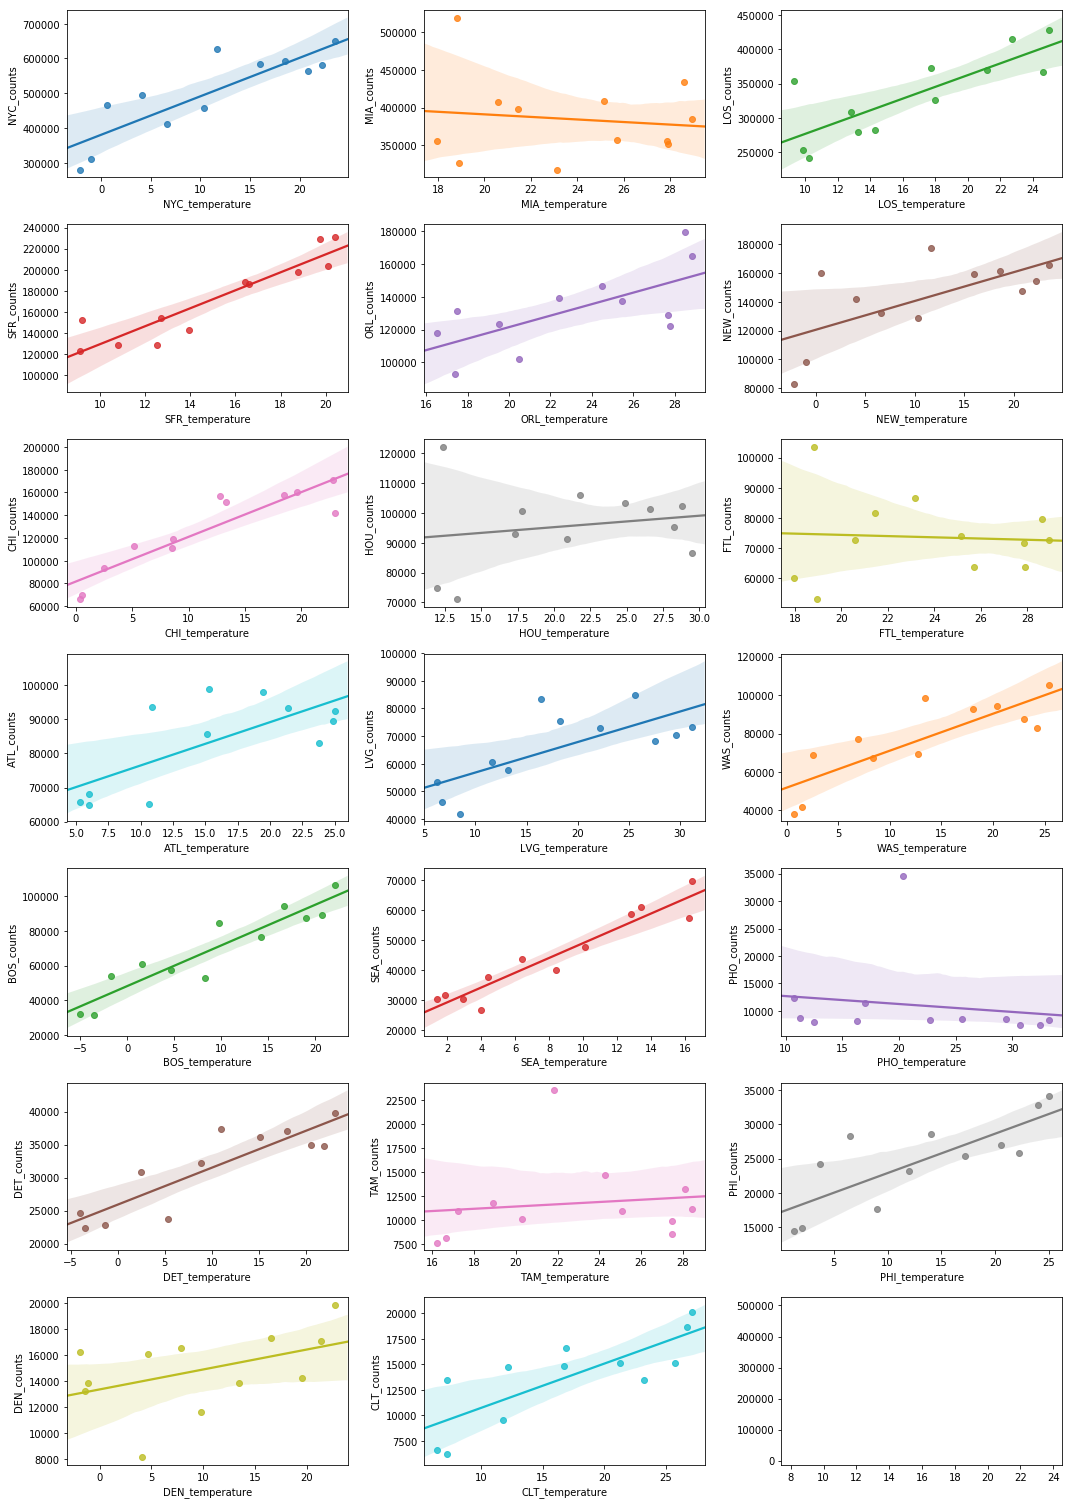

In [16]:
#  plot top 20 cities from april data, including all major port entry_cities.   

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 21))
k = 0
for i in i94port_list[0:20]:   
    sns.regplot(temp_count_dict[i].iloc[:,0], temp_count_dict[i].iloc[:,1], ax=axes[int(k/3), k%3])
    k +=1
plt.tight_layout()

## Conclusion:
#### Travel counts almost linearly correlate with temperatures in most of cities, except in southern warm weather cities like Miami (MIA), Houston (HOU), Tampa (Tam), Phoenix (PHO) and Fort Lauderdale (FLT) as temperatures are relatively warm all year long. 